![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [79]:
import pandas as pd
import numpy as np

df = pd.read_excel('BBDD_Hospitalización.xlsx')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

c:\Users\beren\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [80]:
df.head(10)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


In [81]:
# remplazar los valores de No en 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' por nulos para trabajar con la columna
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO',np.nan)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(float)
df['HOSPITALIZACION'].fillna(0, inplace=True)

reemplazos = {"NO": 0, "SI": 1}
columnas_a_reemplazar = ["DIABETES", "HOSPITALIZACIÓN ULTIMO MES", "BIOPSIAS PREVIAS",'VOLUMEN PROSTATICO','CUP','FIEBRE','ITU','HOSPITALIZACION']

df[columnas_a_reemplazar] = df[columnas_a_reemplazar].replace(reemplazos)
df[columnas_a_reemplazar].astype(bool)
df['HOSPITALIZACION'].value_counts()

#ELIMINAR FILAS CON MAS DE 10 NAN
df.dropna(thresh=10, inplace=True)


In [82]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,0.0,0.0,4.00,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1.0,1.0,0.0,NO,NO,NO,1,2.0,0.0
1,56.0,0.0,0.0,7.70,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1.0,1.0,0.0,NO,NO,NO,1,5.0,0.0
2,57.0,0.0,0.0,29.00,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0.0,NO,NEG,1.0,1.0,0.0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56.0,0.0,0.0,7.00,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,NEG,1.0,1.0,0.0,NO,NO,NO,1,5.0,0.0
4,55.0,0.0,0.0,29.00,1.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0.0,NO,NEG,1.0,1.0,0.0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,0.0,0.0,6.00,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NO,ADENOCARCINOMA GLEASON 6,NaN,0.0,0.0,NO,NO,NO,0,0.0,0.0
564,64.0,0.0,0.0,4.80,0.0,1.0,OTROS,12.0,0.0,NO,ADENOCARCINOMA GLEASON 7,NaN,0.0,0.0,NO,NO,NO,0,0.0,0.0
565,69.0,0.0,0.0,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NaN,0.0,0.0,NO,NO,NO,0,0.0,0.0
566,67.0,0.0,0.0,8.00,0.0,1.0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0.0,NaN,ADENOCARCINOMA GLEASON 7,NaN,0.0,0.0,NO,NaN,NO,0,0.0,0.0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [83]:
#eliminar la variable enf. cronica pulmonar obstructiva porque no esta asociado a los factores 
#que puedan surgir como consecuencia de una biopsia prostatica
df.drop(["ENF. CRONICA PULMONAR OBSTRUCTIVA"], axis=1, inplace= True)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

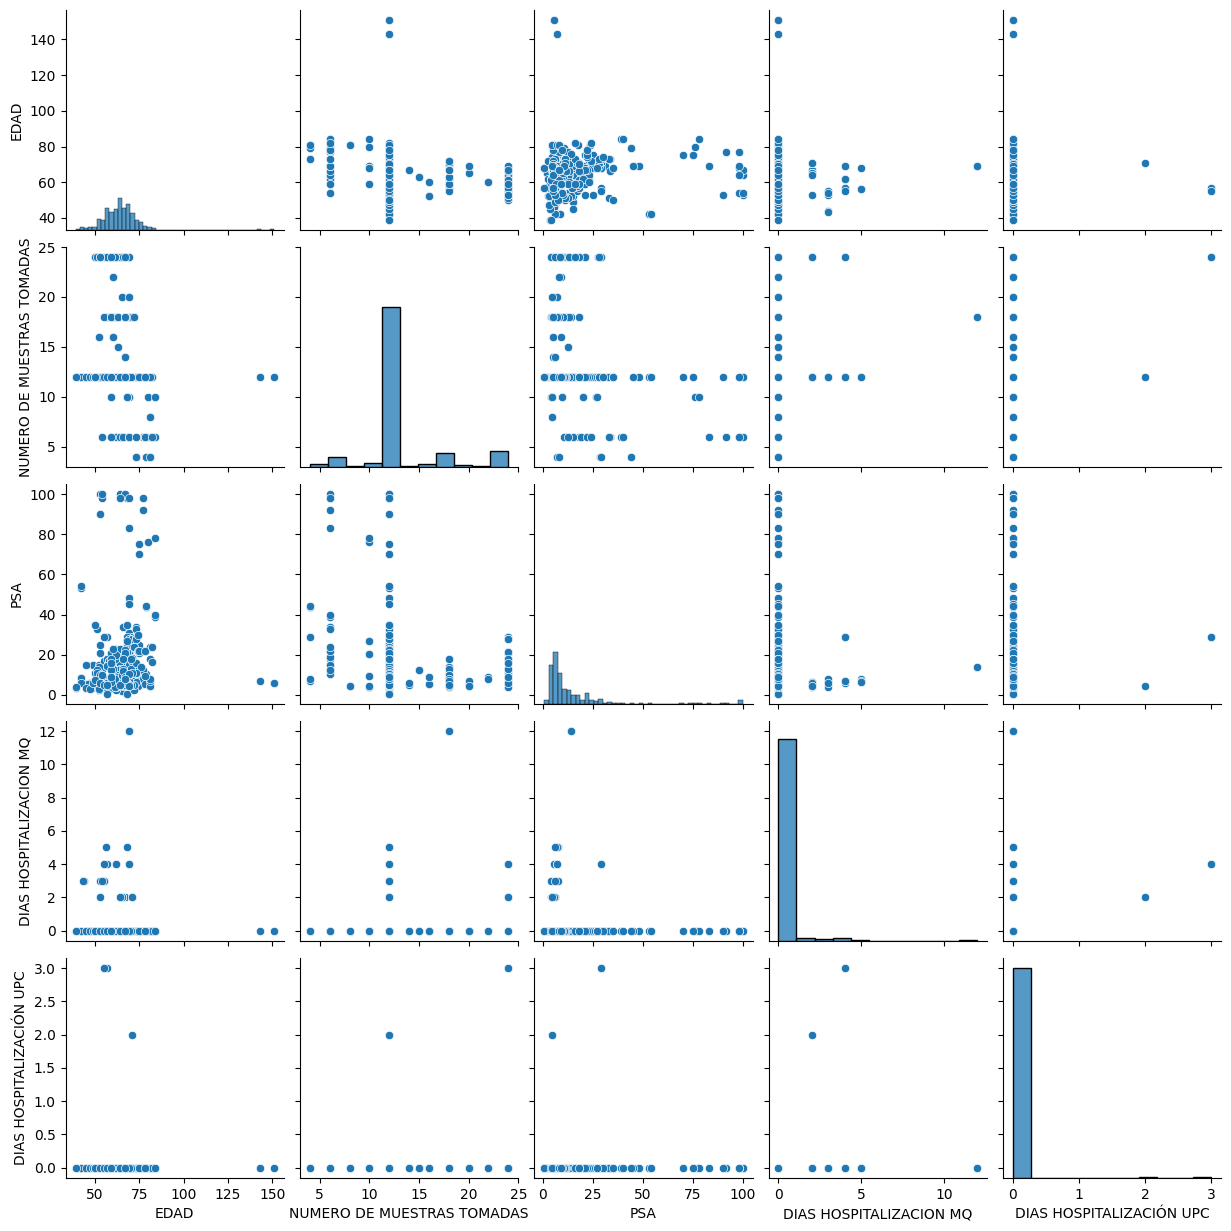

In [85]:
#ver las relaciones entre las variables
objects=["EDAD","NUMERO DE MUESTRAS TOMADAS","PSA","DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"]
sns.pairplot(df, vars=objects)

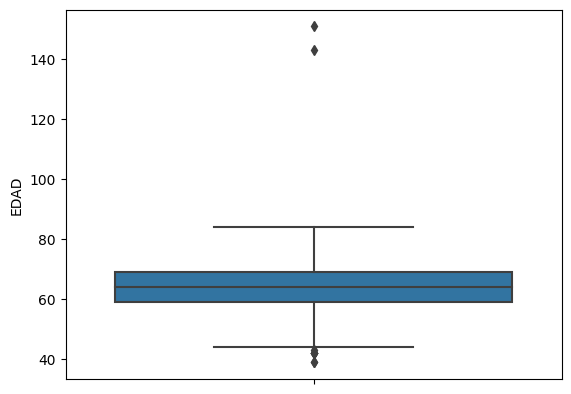

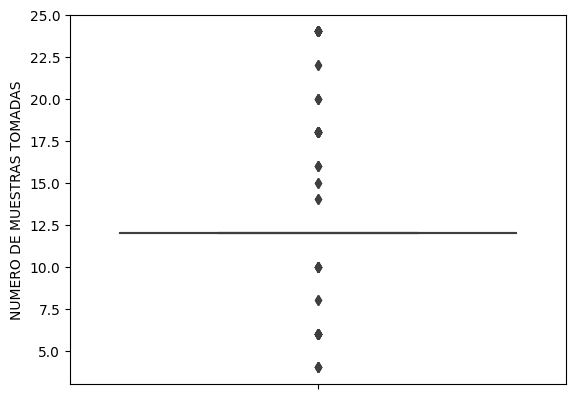

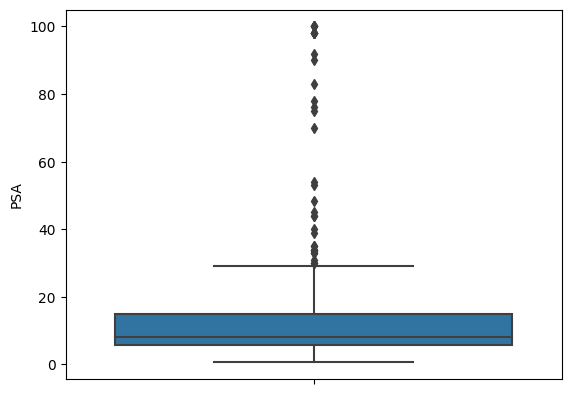

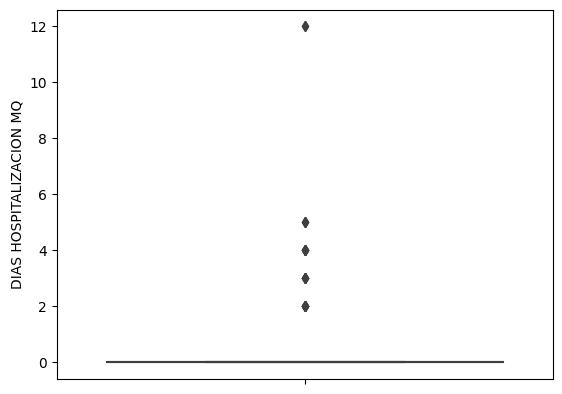

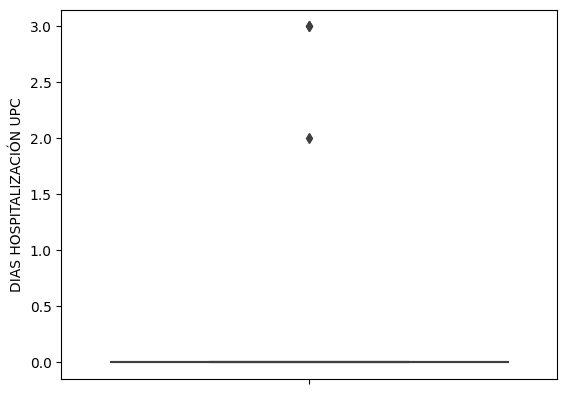

In [86]:
#ver los outliers con boxplot
for i in objects:
    plt.figure()
    sns.boxplot(data=df,y=i)


In [87]:
#ecnontrar la correlacion de las variablews numericas
corr=df[["EDAD","NUMERO DE MUESTRAS TOMADAS","PSA","DIAS HOSPITALIZACION MQ", "DIAS HOSPITALIZACIÓN UPC"]].corr()



<AxesSubplot: >

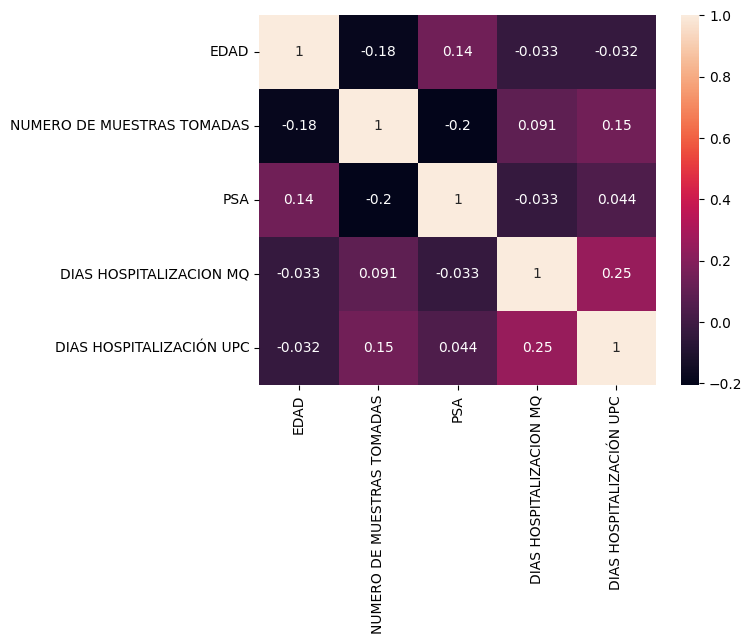

In [88]:
#grafico de las correlaciones
plt.figure()
sns.heatmap(corr,annot=True)

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [89]:
#guardar en otra tabla los outliers de edad
df1=df[df["EDAD"]>122]
#encontrar la mediana para reemplazarla
df["EDAD"].median()

64.0

In [90]:
#reemplzar los valores con la media
df.loc[df["EDAD"]>122, "EDAD"]=64

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [91]:
columns_names = df.columns.values
columns_names

array(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype=object)

In [92]:
columns=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
       'CUP', 'BIOPSIA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION']
for i in columns:
    print(df[i].value_counts())
    

DIABETES
0.0    505
1.0     63
Name: count, dtype: int64
HOSPITALIZACIÓN ULTIMO MES
0.0    563
1.0      5
Name: count, dtype: int64
BIOPSIAS PREVIAS
0.0    510
1.0     56
Name: count, dtype: int64
VOLUMEN PROSTATICO
1.0    408
0.0    159
Name: count, dtype: int64
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    448
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
FLUOROQUINOLONA_AMINOGLICÓSIDO      4
Name: count, dtype: int64
CUP
0.0    563
1.0      4
Name: count, dtype: int64
BIOPSIA
NEG                                           322
ADENOCARCINOMA GLEASON 7                      106
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 8                       22
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 6                       16
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
ADENOCARCINOMA GLEAS

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [93]:
#ecnontrar la correlacion de dos variables
corr2=df[['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','HOSPITALIZACION']].corr()

<AxesSubplot: >

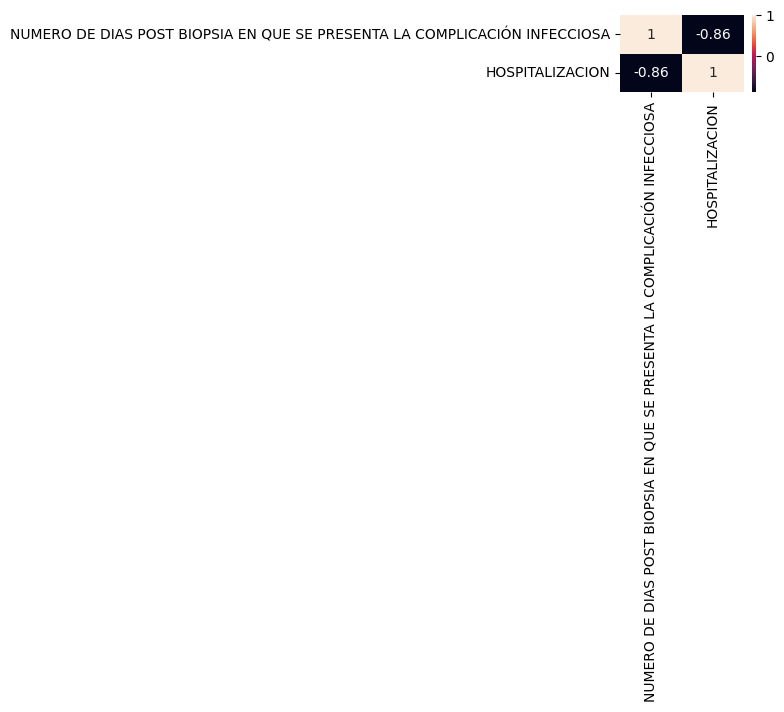

In [94]:
#grafico de las correlaciones
plt.figure(figsize=(2,1))
sns.heatmap(corr2,annot=True)

In [95]:
#eliminar dos culmnas adicionales "tipo de cultivo" y "agente aislado", pues se trata de examanes de orina y sangre qeu sirvieron para  diagnosticas e.coli o pesudonomoas aeruginosa, que son irrelevantes en las biopsia
df.drop(["TIPO DE CULTIVO","AGENTE AISLADO" ], axis=1, inplace= True)

In [96]:
#eliminar "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA" porque no hay sufientes valores no nulos
df.drop(["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA" ], axis=1, inplace= True)

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     568 non-null    float64
 1   DIABETES                                 568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES               568 non-null    float64
 3   PSA                                      564 non-null    float64
 4   BIOPSIAS PREVIAS                         566 non-null    float64
 5   VOLUMEN PROSTATICO                       567 non-null    float64
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS               568 non-null    float64
 8   CUP                                      567 non-null    float64
 9   BIOPSIA                                  568 non-null    object 
 10  FIEBRE                                   568 non-null  

In [98]:
columns_names = df.columns.values
columns_names

array(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'BIOPSIA', 'FIEBRE', 'ITU',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype=object)

In [103]:
#ecnontrar la correlacion de las variablews numericas
corr3=df[['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP','FIEBRE', 'ITU',
       'HOSPITALIZACION','DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']].corr()

<AxesSubplot: >

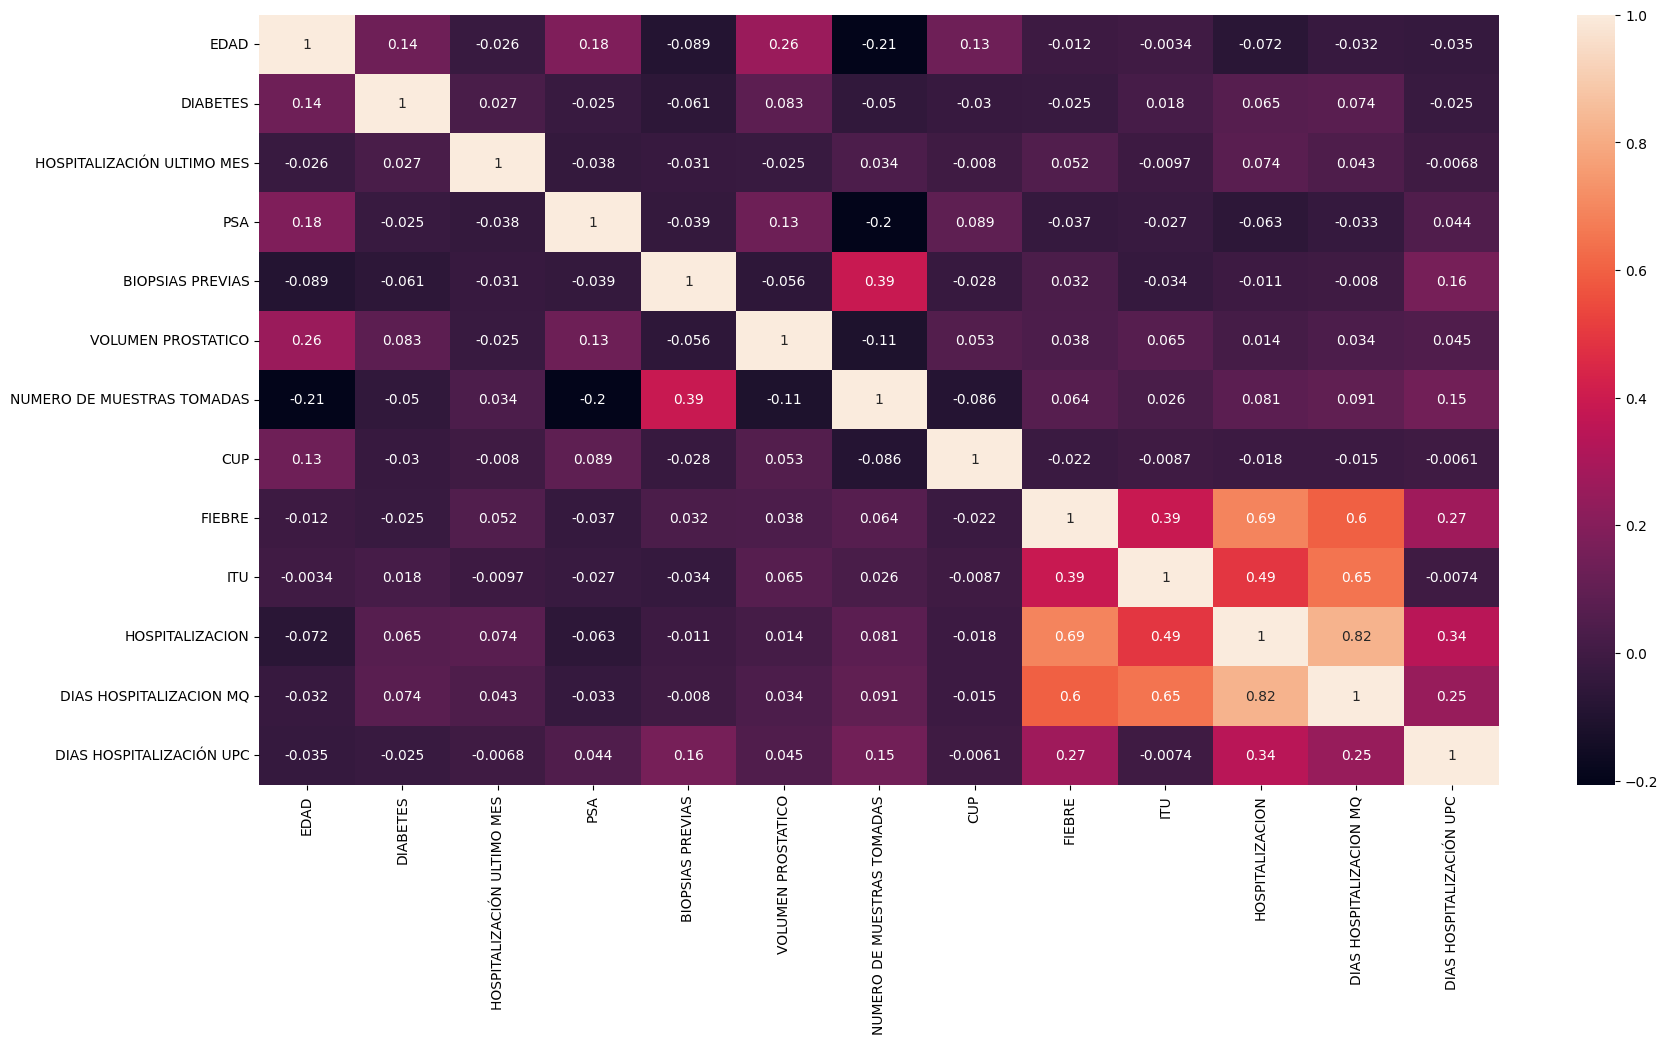

In [104]:
#grafico de las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(corr3,annot=True)

In [105]:
#borrar las columnas con mas alta correlacion 'FIEBRE', 'ITU','DIAS HOSPITALIZACION MQ'

df.drop(['FIEBRE', 'ITU','DIAS HOSPITALIZACION MQ'], axis=1, inplace= True)

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [ ]:
s